### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak naprawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks

In [2]:
def img_show(image):
    plt.figure(figsize=(7, 7))
    plt.imshow(image, cmap="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()
    
    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].set_aspect('equal')
    ax[1].axis('image')
    forceAspect(ax[1])
    
    plt.tight_layout()
    plt.show()

def trans_ab(image: np.ndarray, aMin, aMax, aSkok, bMin, bMax, bSkok):
    """
    Parameters:
    image (np.ndarray): obraz binarny

    Returns:
    h (np.array): przekształcona macierz
    """
    a_vect = np.arange(aMin, aMax, aSkok)
    b_vect = np.arange(bMin, bMax, bSkok)
    h = np.zeros((b_vect.shape[0], a_vect.shape[0]))
    x, y = image.shape
    for i in range(x):
        for j in range(y):
            if image[i, j] == 1:
                for idx, item in enumerate(a_vect):
                    b = i - item * j
                    b_idx = np.argmin(np.abs(b_vect - b))
                    h[b_idx, idx] += 1
    return h

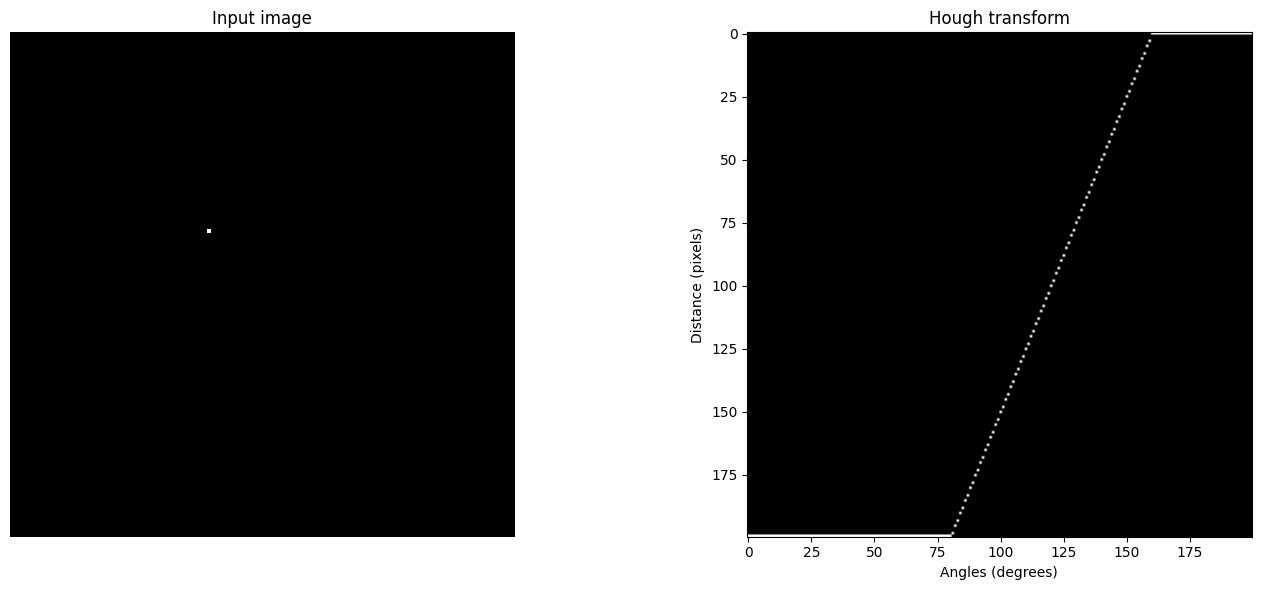

In [3]:
im = np.zeros((128, 128))
im[50, 50] = 1
im_t = trans_ab(im, -5, 5, 0.05, -100, 100, 1)
show_hough(im_t, im)

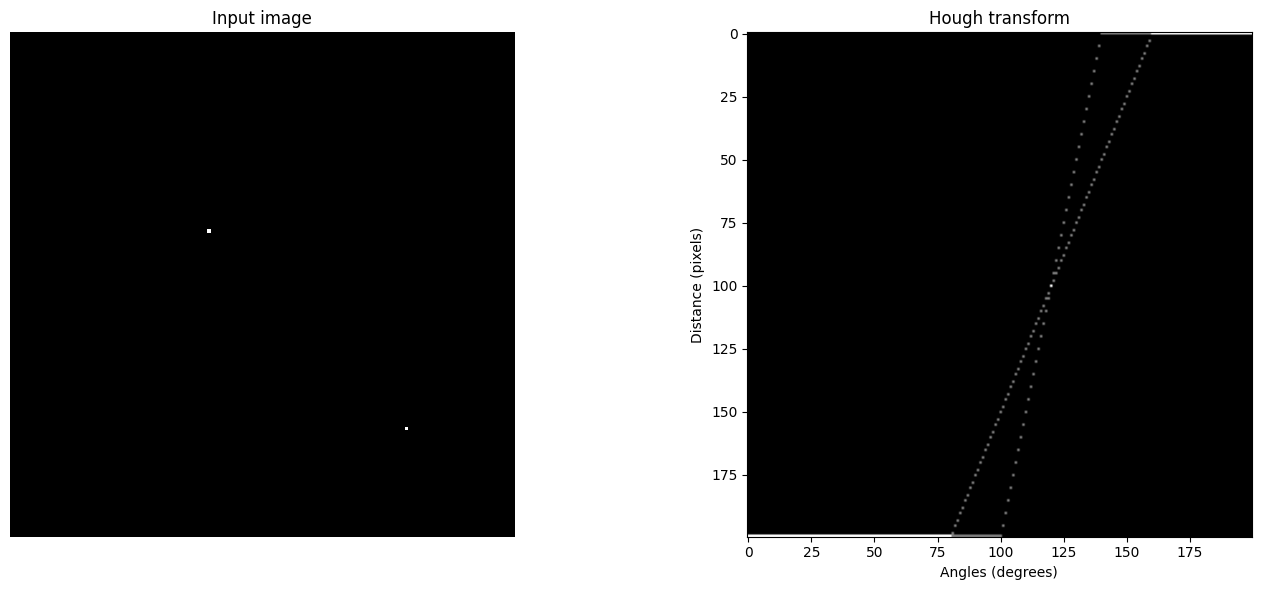

In [4]:
im = np.zeros((128, 128))
im[50, 50] = 1
im[100, 100] = 1
im_t = trans_ab(im, -5, 5, 0.05, -100, 100, 1)
show_hough(im_t, im)

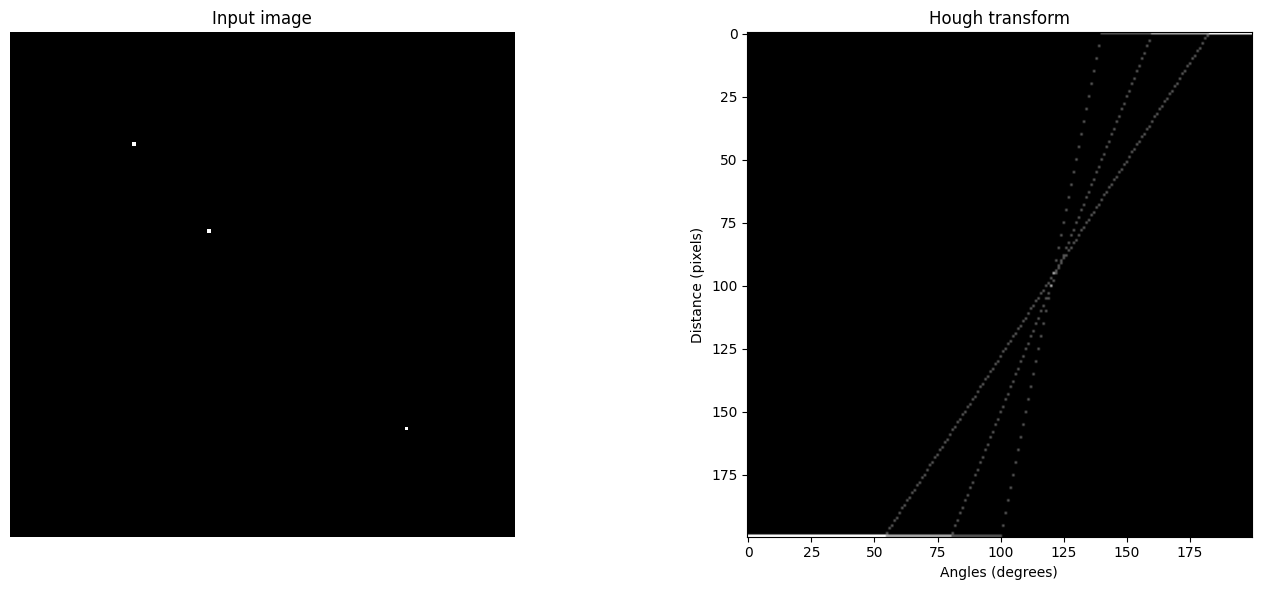

In [5]:
im = np.zeros((128, 128))
im[50, 50] = 1
im[100, 100] = 1
im[28, 31] = 1
im_t = trans_ab(im, -5, 5, 0.05, -100, 100, 1)
show_hough(im_t, im)

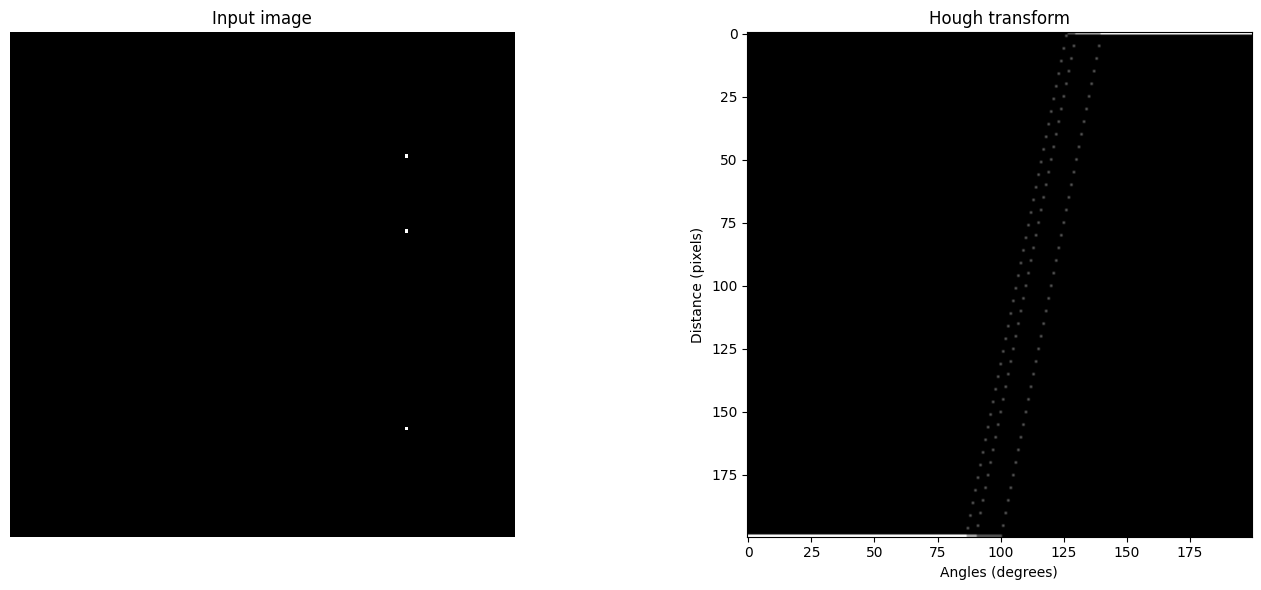

In [6]:
im = np.zeros((128, 128))
im[50, 100] = 1
im[100, 100] = 1
im[31, 100] = 1
im_t = trans_ab(im, -5, 5, 0.05, -100, 100, 1)
show_hough(im_t, im)